In this assignment, you will measure the performance of the model you created with the Titanic data in the previous lesson. To complete this assignment, send a link to a Jupyter notebook containing solutions to the following tasks.

- Evaluate the performance of your model with the metrics you have learned in this course.
- Plot the ROC and the precision / recall curves for different "c" values.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
PATH ='/content/drive/MyDrive/Colab Notebooks/Datajarlabs/8-Classification_Problems'
os.chdir(PATH)

In [ ]:
df = pd.read_csv('train (3).csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [ ]:
df['Age'] = df['Age'].fillna(int(df['Age'].mean())).astype('int64')
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].value_counts().index[0])

In [ ]:
df.drop('PassengerId', axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)
df.drop('Cabin', axis=1, inplace=True)
df.drop('Name', axis=1, inplace=True)

In [ ]:
df['Sex'] = pd.get_dummies(df['Sex'], drop_first=True).rename(columns={'male':'Sex'})
df = pd.concat([df.drop('Embarked', axis=1), pd.get_dummies(df['Embarked'], drop_first=True).rename({})], axis=1)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22,1,0,7.2500,0,1
1,1,1,0,38,1,0,71.2833,0,0
2,1,3,0,26,0,0,7.9250,0,1
3,1,1,0,35,1,0,53.1000,0,1
4,0,3,1,35,0,0,8.0500,0,1


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## 1. Confusion Matrix

In [ ]:
from sklearn.linear_model import LogisticRegression

prediction_model = LogisticRegression(max_iter=1000)
prediction_model.fit(X_train, y_train)

train_prediction = prediction_model.predict(X_train)
test_prediction = prediction_model.predict(X_test)

test_prediction_probability = prediction_model.predict_proba(X_test)[:,1]

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix_train = confusion_matrix(y_train, train_prediction)
confusion_matrix_test = confusion_matrix(y_test, test_prediction)

In [ ]:
print("Confusion Matrix (Train Data)", "-"*30, confusion_matrix_train, sep="\n")
print("\n\nConfusion Matrix (Test Data)", "-"*30, confusion_matrix_test, sep="\n")

Confusion Matrix (Train Data)
------------------------------
[[319  60]
 [ 67 177]]


Confusion Matrix (Test Data)
------------------------------
[[140  30]
 [ 26  72]]


In [ ]:
TN = confusion_matrix_test[0][0]
TP = confusion_matrix_test[1][1]
FN = confusion_matrix_test[1][0]
FP = confusion_matrix_test[0][1]

print("True negative amount  :", TN)
print("True positive amount  :", TP)
print("False positive amount :", FP)
print("False negative amount :", FN)

True negative amount  : 140
True positive amount  : 72
False positive amount : 30
False negative amount : 26


### 1.1 Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

print("Accuracy value by the model   : ",  prediction_model.score(X_test, y_test))
print("Calculated accuracy value     : ",  (TN + TP)/(FN + FP + TN + TP))
print("accuracy_score() value        : ",  accuracy_score(y_test, test_prediction))


Accuracy value by the model   :  0.7910447761194029
Calculated accuracy value     :  0.7910447761194029
accuracy_score() value        :  0.7910447761194029


### 1.2 Precision

In [ ]:
from sklearn.metrics import precision_score

print("Calculated precision value   : ",  (TP)/(FP + TP))
print("precision_score() value      : ",  precision_score(y_test, test_prediction))

Calculated precision value   :  0.7058823529411765
precision_score() value      :  0.7058823529411765


### 1.3. Recall / Sensitivity

In [ ]:
from sklearn.metrics import recall_score

print("Calculated recall value   : ",  (TP)/(TP + FN))
print("recall_score() value      : ",  recall_score(y_test, test_prediction))

Calculated recall value   :  0.7346938775510204
recall_score() value      :  0.7346938775510204


### 1.4 Specificity

In [ ]:
print("Calculated specificity value   : ",  (TN)/(TN + FP))

Calculated specificity value   :  0.8235294117647058


### 1.5 F1 Score

In [ ]:
from sklearn.metrics import f1_score

precision = precision_score(y_test, test_prediction)
recall = recall_score(y_test, test_prediction)


print("Calculated F1 score  : ",  2*((recall*precision)/(recall + precision)))
print("f1_score() value     : ",  f1_score(y_test, test_prediction))

Calculated F1 score  :  0.7200000000000001
f1_score() value     :  0.7200000000000001


In [ ]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

print(classification_report(y_test, test_prediction))

print("f1_score() value        : {:.2f}".format(f1_score(y_test, test_prediction)))
print("recall_score() value    : {:.2f}".format(recall_score(y_test, test_prediction)))
print("precision_score() value : {:.2f}".format(precision_score(y_test, test_prediction)))
print('\n')

metrics = precision_recall_fscore_support(y_test, test_prediction)
print("Precision  :" , metrics[0]) 
print("Recall     :" , metrics[1]) 
print("F1 Score   :" , metrics[2]) 

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       170
           1       0.71      0.73      0.72        98

    accuracy                           0.79       268
   macro avg       0.77      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268

f1_score() value        : 0.72
recall_score() value    : 0.73
precision_score() value : 0.71


Precision  : [0.84337349 0.70588235]
Recall     : [0.82352941 0.73469388]
F1 Score   : [0.83333333 0.72      ]


## 2. ROC Curve (ROC / AUC)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score


In [ ]:
test_prediction_proba = prediction_model.predict_proba(X_test)[:,1]

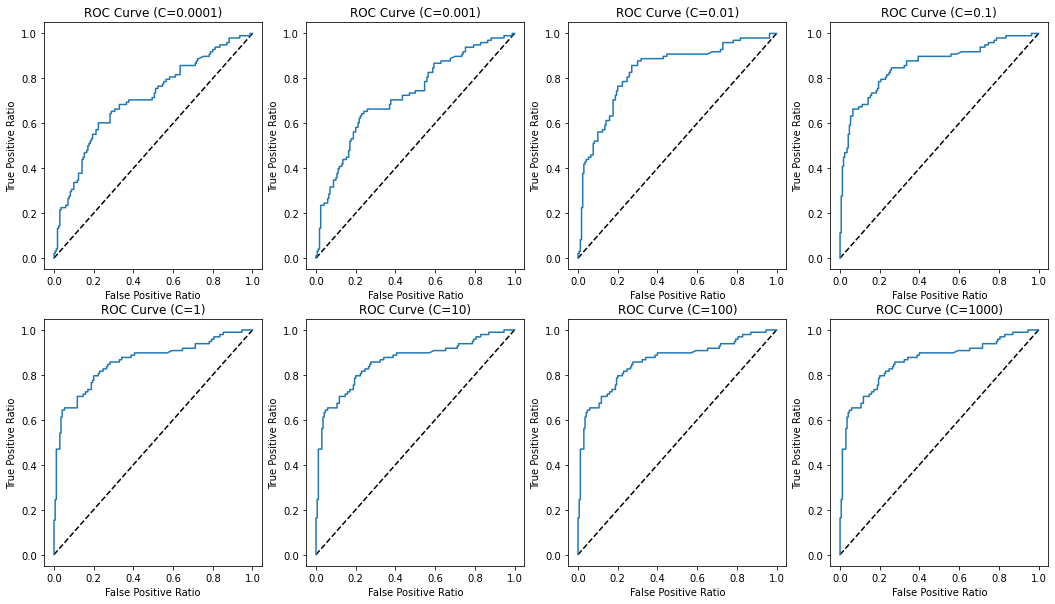

In [ ]:
 plt.figure(figsize=(18, 10))
for i in range(-4, 4, 1):
    plt.subplot(2, 4, i+5)
    log_reg = LogisticRegression(max_iter=1000, C=10**i)
    log_reg.fit(X_train, y_train)
    test_prediction_proba = log_reg.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, test_prediction_proba)
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    
    plt.xlabel('False Positive Ratio')
    plt.ylabel('True Positive Ratio')
    plt.title('ROC Curve (C={})'.format(10**i))

plt.show()

In [ ]:
for i in range(-4, 4, 1):
    lr = LogisticRegression(max_iter=1000, C=10**i)
    lr.fit(X_train, y_train)
    test_prediction_proba = lr.predict_proba(X_test)[:,1]
    print('AUC value (C={}): {:.5f}'.format((10**i), roc_auc_score(y_test, test_prediction_proba)))

AUC value (C=0.0001): 0.70702
AUC value (C=0.001): 0.72515
AUC value (C=0.01): 0.83265
AUC value (C=0.1): 0.85924
AUC value (C=1): 0.85900
AUC value (C=10): 0.85912
AUC value (C=100): 0.85918
AUC value (C=1000): 0.85912


## 3. Precision / Recall Curve

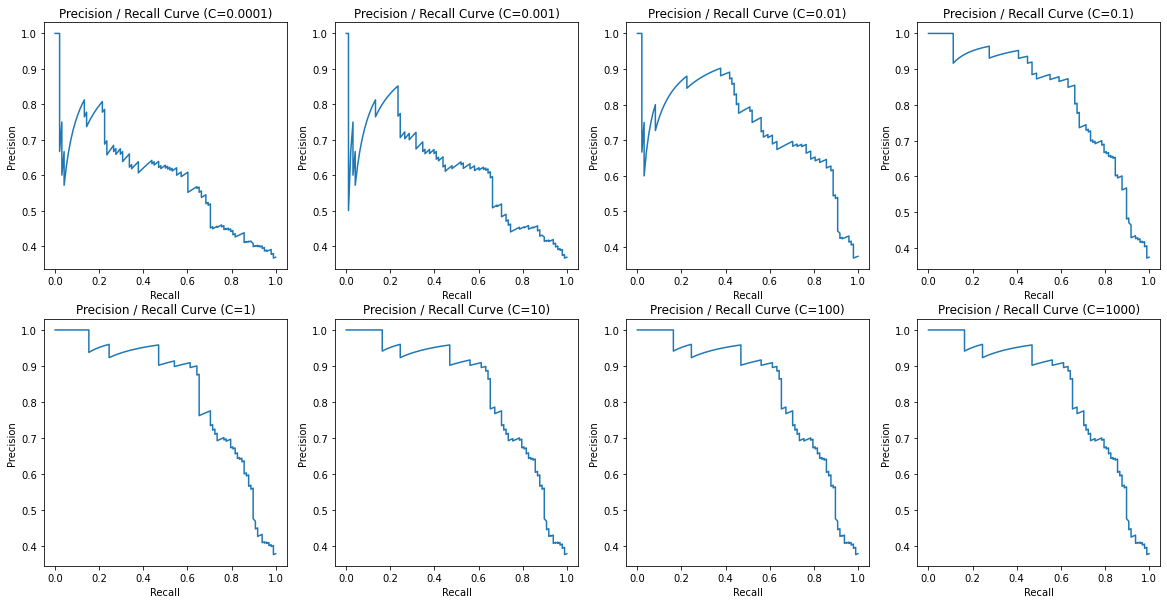

In [ ]:
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(20, 10))
for i in range(-4, 4, 1):
    plt.subplot(2, 4, i+5)
    lr = LogisticRegression(max_iter=1000, C=10**i)
    lr.fit(X_train, y_train)
    test_prediction_proba = lr.predict_proba(X_test)[:,1]
    precision, recall, _ = precision_recall_curve(y_test, test_prediction_proba)
    
    plt.plot(recall, precision)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision / Recall Curve (C={})'.format(10**i))


plt.show()